<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: Zhuoran Yang
### ***CID***: 02270120

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [1]:
!pip install livelossplot
%pylab inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Populating the interactive namespace from numpy and matplotlib


In [2]:
### write the imports you will need here.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Dataset 
from livelossplot import PlotLosses
from torchvision.utils import make_grid
import matplotlib.pyplot as plt  # Plotting using matplotlib
import numpy as np  # Numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST,FashionMNIST
import random 

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [3]:
SEED = 42
set_seed(42)

True

<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

# Solution

# Q1.1 - Q1.2
Firstly I defined a transform pipeline to normalized the data and set it to tensor, then I save the transformed dataset to dataloader for further use in CVAE model. Note that I just used the whole FashionMNIST for training purpose.

Then I plot the 10*10 matrix of images for each class in the dataset by selecting the indices.

In [4]:
### your code here (add as many code blocks as you need)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_set = FashionMNIST("./data", download=True, transform=transform)
test_set = FashionMNIST("./data", download=True, train=False, transform=transform)
train_dataset = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataset = DataLoader(test_set, batch_size=64, shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
train_set.data.shape
train_set.targets.shape 

# shape of the data and targets

torch.Size([60000, 28, 28])

In [7]:
indices=[train_set.targets==i for i in range(10)]
t = [torch.unsqueeze(train_set.data[indices[i]][:10], 1) for i in range(10)]
final_t = torch.cat([t[i] for i in range(10)], 0)

# get the indices and concat a final_t for grid plotting purpose.

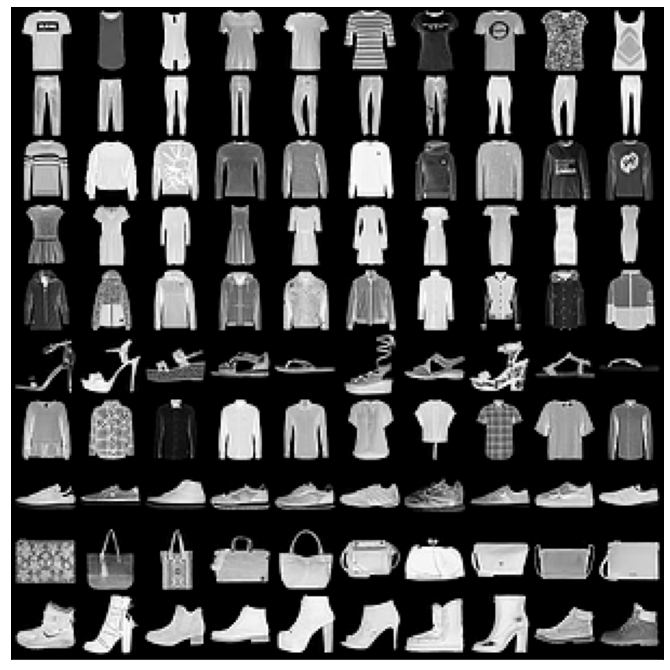

In [10]:
input_grid = make_grid(final_t, nrow = 10)
plt.figure(figsize=(12,12))
plt.imshow(input_grid.permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.show()

# Here is the 10*10 matrix for each classes.

# Q1.3
The dataset is well balanced since for each class, the number of training sample is equal to 6000 with in total 60000 as desired.

In [11]:
shape=[]
ts = [torch.unsqueeze(train_set.data[indices[i]], 1) for i in range(10)]
for i in range(10):
  shape.append(ts[i].shape[0])

In [12]:
shape
# numbers for each class.

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



# Solution

# Q2 Modifications
Firstly I added four NN hidden layers symmetrically in the encoder and decoder. But for the output layer in the decoder (input layer in the encoder accordingly), the activation function RELU works really bad so I substitute it into Sigmoid function. The reason is that sigmoid is especially used for models where we have to predict the probability as an output. And we just normalized the data before and the output is approximately within that range as probability.

Secondly, a convolutional layer was added before putting the label in our encoder. Here is the reason. In the previous training process, I saw in the plots that my CVAE with only NN generates nearly the same images for each of the label so that I think inputs with only 784+10 features are not enough for models to learn. Hence I played a trick using the idea of convolutional layers to extract more images (Maxpool2d is also used for rejecting a big chunk of data, extracting their most salient features) and flattened these images for further training.   

In [86]:
label_len = 10

In [87]:
class CVAE_Encoder(nn.Module): 
  def __init__(self):
    super(CVAE_Encoder, self).__init__()

    self.input = (14*14*5) + label_len
    self.layerc0 = nn.Sequential(
        nn.Conv2d(1, 5, 3, padding=1,), # Pad 
        nn.MaxPool2d(2),
   )  # Dims in 28*28-> out 14*14

    self.layer0 = nn.Linear(self.input, 1024) # Image to hidden, fully connected
    self.transform0 = nn.Sigmoid()
    self.layer1 = nn.Linear(1024, 512) # Image to hidden, fully connected
    self.transform1 = nn.ReLU()
    self.layer2 = nn.Linear(512, 256) # Image to hidden, fully connected
    self.transform2 = nn.ReLU()
    self.layer3 = nn.Linear(256, 128) # Image to hidden, fully connected
    self.transform3 = nn.ReLU()

  def forward(self, x, labels): 
    x = self.layerc0(x)
    x = x.view(-1, 14*14*5)
    x = torch.cat((x, labels), 1) # training with labels for encoder.
    x = self.transform0(self.layer0(x))  
    x = self.transform1(self.layer1(x))  
    x = self.transform2(self.layer2(x)) 
    x = self.transform3(self.layer3(x)) 

    # all forward processes.
    return x


In [88]:
from torch.nn.modules.activation import Sigmoid
class CVAE_Decoder(nn.Module):
  def __init__(self):
    super(CVAE_Decoder, self).__init__()

    self.layer1 = nn.Linear(128, 256) # Connectivity Latent to Hidden
    self.activation1 = nn.ReLU()
    self.layer2 = nn.Linear(256, 512) # Connectivity Latent to Hidden
    self.activation2 = nn.ReLU()
    self.layer3 = nn.Linear(512, 1024) # Connectivity Latent to Hidden
    self.activation3 = nn.ReLU()
    self.layerOut = nn.Linear(1024, 14*14*5) # Connectivity Hidden to Image
    self.activationOut = nn.Sigmoid()

    self.layerc0 = nn.Sequential(
        nn.Conv2d(5, 1, 3, padding=1),
        nn.Upsample(scale_factor=2, mode='bilinear'))
       # Dims in 14*14 -> out 28*28

  def forward(self, z):

    z = self.activation1(self.layer1(z))  
    z = self.activation2(self.layer2(z)) 
    z = self.activation3(self.layer3(z)) 
    z = self.activationOut(self.layerOut(z)) # Run Image through Linear transform then Sigmoid activation function
    z = z.view(-1,5,14,14)
    z = self.layerc0(z)
    return  z.view(-1,1,28,28) # Reshape the vector into an image

print('done')

done


In [89]:
class CVariationalAutoencoder(nn.Module):
  def __init__(self, dims_latent):
    '''
    Class combines the Encoder and the Decoder.

    dims_latent: [int] the dimension of (number of nodes in) the mean-field gaussian latent variable
    '''

    super(CVariationalAutoencoder, self).__init__()
    self.encoder = CVAE_Encoder()
    self.decoder = CVAE_Decoder()

    self.dims_latentC = dims_latent + label_len
    self.dims_latent = dims_latent

    self.layerMu = nn.Linear(128, self.dims_latent)  # Hidden to latent, fully connected
    self.layerSig = nn.Linear(128, self.dims_latent)  # Hidden to latent, fully connected
    self.distribution = torch.distributions.Normal(0, 1)  # Sample from N(0,1)


    self.latentOut = nn.Linear(self.dims_latentC, 128) # Connectivity Latent to Hidden
    self.activationOut = nn.ReLU()


  def vae_latent_space(self, x):
    mu =  self.layerMu(x)   # Turn the output of the Encoder into Mu
    sigma = torch.exp(self.layerSig(x))  # Exponential activation ensures positivity for Sigma
    z = mu + sigma * self.distribution.sample(mu.shape).to(device)
    kl_div = ((sigma**2 + mu**2 - torch.log(sigma) - 1)*(1/2)).sum() # KL-divergence.
    return z, kl_div

  def forward(self, x, labels):

    x = self.encoder(x,labels)  # train with labels for encoder.
    z, kl_div = self.vae_latent_space(x) # sampling in latent space.
    z = torch.cat((z, labels), 1) # concat labels and z.
    z = self.activationOut(self.latentOut(z))  # Take the latent vector and make the input for the Decoder.
    return self.decoder(z), kl_div # train with labels for decoder.

print('done')

done


# Q2 Loss Plot
Use the liveloss function. Note that our log-loss is the weighed-average log-loss for every batches in each epoch so normally it will not viberate if we train properly.

The hyperparameters are mostly set to default but we defined the learning rate above and set dim_latent to 48 since we want more informations from the images. 

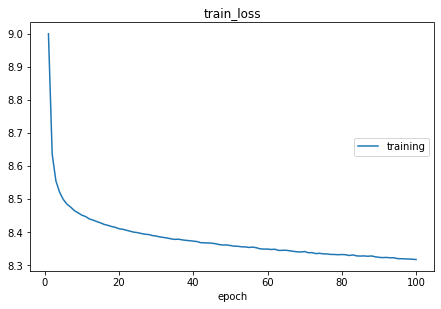

done


In [92]:
def train(autoencoder, data, epochs, kl_div_on=True):
  set_seed(42)
  liveloss = PlotLosses() 
  opt = torch.optim.Adam(autoencoder.parameters())
  for epoch in range(epochs): # Run data over numerous epochs
    logs = {} 
    train_loss = 0
    for batch, label in data:  # Iterate over the batches of images and labels
      batch = batch.to(device)  # Send batch of images to the GPU
      labels = F.one_hot(label,10).to(device)
      opt.zero_grad()  # Set optimiser grad to 0
      x_hat, KL = autoencoder(batch,labels)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      loss = ((batch - x_hat)**2).sum() + KL  # Calculate combined loss
      loss.backward()  # Back-propagate
      train_loss += np.log(loss.detach().cpu().numpy())*batch.size(0) # define our training loss
      opt.step()  # Step the optimiser

    logs['train_loss'] = (train_loss/len(data.dataset)) # plot the training loss.
    liveloss.update(logs)
    liveloss.draw()   

  return autoencoder  # Return the trained autoencoder (for later analysis)

dims_latent = 48  
CVAE = CVariationalAutoencoder(dims_latent).to(device)
CVAE = train(CVAE, train_dataset, 100)

print('done')

# Training with CVAE with balanced dataset.

In [93]:
torch.save(CVAE,'cvae.pkl')

In [94]:
cvae = torch.load('cvae.pkl')

# Q2 Plot Example
The code below is just defining several functions to plot 10*10 examples.
Note that one_hot is a helper function for us to deal with the labels.

In [98]:
def one_hot(x, x1):
    return torch.eye(x1 + 1)[x]
# one-hot encode labels.

In [99]:
def plot_sample(autoencoder,label,dims_latent):
    ll = one_hot([label],9).to(device)
    z =[torch.stack([torch.randn(dims_latent,).to(device).float()]) for i in range(10)] # random pick
    img = [autoencoder.decoder(autoencoder.activationOut(autoencoder.latentOut(torch.cat((z[i], ll), 1)))).to('cpu')[0][0] for i in range(10)] # decode using trained model above.
    return torch.stack(img)

def plot_grid(autoencoder,label_numbers):
    final_img = []
    for i in range(label_numbers):
      final_img.append(plot_sample(autoencoder,i,dims_latent))
    final_img = torch.stack(final_img)
    img_grid =torch.stack([torch.unsqueeze(final_img[i], 1) for i in range(10)])
    final_grid = torch.cat([img_grid[i] for i in range(10)], 0) # generate final grid.
    final_grid = make_grid(final_grid, nrow = 10)
    plt.figure(figsize=(8,8))
    plt.imshow(torch.abs(final_grid.permute(1,2,0)))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    plt.savefig("./generated_image.jpg")

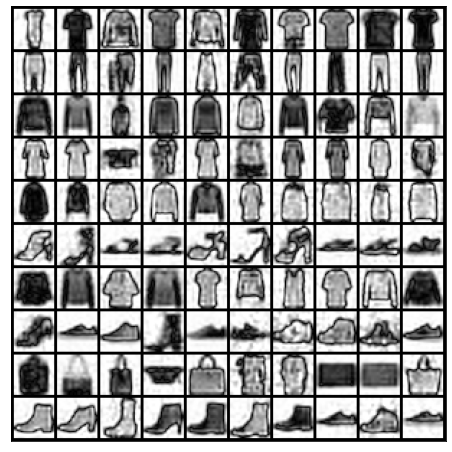

<Figure size 432x288 with 0 Axes>

In [179]:
plot_grid(cvae,10) # CVAE is our model and 10 is the number of classes.

<br>

---

<br>

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

# Solution

# Q3 Modification
Firstly, my CGAN model uses fully convolutional layers. Here are some details. For the label inputs in Generator, I set them to (100,10,1,1) and one-hot encoded them so that it can fit in the Deconv process. Same dimentional tricks applyed for random samples z_i. Similiarly, for the label inputs in Discriminator, I expanded them with into (-1,1,32,32) such that it can fit in the conv process. Please note that our image size here is 32*32 since I did some transformations in the dataset before training.

Next, I just trained these labels and input-images using a single convolutional layer (pre_net_label, pre_net_x) accordingly and concated them (concat_label) for further convolutional training (net_all). So it's just a convolutional version of training with labels. What's more, different activation functions are used such as tanh, LeakyReLU and sigmoid for accuracy. Also batch normalizations and probabilistic dropout were applied to mitigate internal covariate shifts and generate small regularization effects.



In [5]:
z_dim = 100
batch_size = 100
lr = 0.00025
# hyperparams.

In [6]:
transform1 = transforms.Compose([transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# New transformation defined.

train_set = FashionMNIST("./data", download=True, transform=transform1)
train_dataset = DataLoader(train_set, batch_size=batch_size, shuffle=True)

# train_dataset with new batch_size.

In [73]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        
        self.pre_net_label=nn.Sequential(
            nn.Conv2d(10, 64, kernel_size=4, stride=2, padding=1), 
            nn.LeakyReLU(inplace=True)
        )
        # pre_conv process for labels.

        self.pre_net_x=nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),                             
            nn.LeakyReLU(inplace=True)
        )
        # pre_conv process for x. 

        self.net_all = nn.Sequential(
            # Discriminator receives 128*16*16
            nn.Conv2d(128, 96, kernel_size=4, stride=2,padding=1), 
            nn.BatchNorm2d(96),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Now with 96*8*8 
            nn.Conv2d(96, 1, kernel_size=8, stride=1,padding=0),
            nn.Sigmoid()
        )  
        # Further convolutional training for both x and labels.

    def forward(self, x, labels):
        x = x.view(100,1,32,32)
        x = self.pre_net_x(x)
        labels = labels.float()
        labels = self.pre_net_label(labels)
        # Apply pre_convolutional process for both labels and x.

        x = torch.cat((x, labels), 1)
        x = self.net_all(x)
        # Concating labels and apply further convolutional training.

        return x.view(100)

class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        
        
        self.pre_net_label = nn.Sequential(
            nn.ConvTranspose2d(10, 256, kernel_size=4, stride=1), 
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        # Pre_deconv process for label.
        self.pre_net_x = nn.Sequential(
            nn.ConvTranspose2d(100,256, kernel_size=4, stride=1), 
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        # Pre_deconv process for x.

        self.net_all = nn.Sequential(
            # generator receives 512*4*4
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride =2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2,inplace=True),
           
            # now with 256*8*8
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2,inplace=True),
            nn.BatchNorm2d(128),
            
            # Now with 128*16*16
            nn.ConvTranspose2d(128, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
            # output with 1*32*32 Tanh activation
        )
        # Further deconvolutional training for both x and labels.

    def forward(self, x, labels):
        x = self.pre_net_x(x)
        labels = self.pre_net_label(labels)
        # Apply pre_deconv process for both labels and x.
        
        x = torch.cat((x, labels), 1)
        x = self.net_all(x)
        # Concating labels and apply further deconvolutional training.

        return x.view(-1,32,32)

In [74]:
G = Generator().to(device)
D = Discriminator().to(device)

In [45]:
D

Discriminator(
  (pre_net_label): Sequential(
    (0): Conv2d(10, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (pre_net_x): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (net_all): Sequential(
    (0): Conv2d(128, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(96, 1, kernel_size=(8, 8), stride=(1, 1))
    (4): Sigmoid()
  )
)

In [75]:
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)
criterion = nn.BCELoss()
# Define optimizers and our binary loss.

In [76]:
def G_train():
    G_optimizer.zero_grad()

    z = torch.randn(batch_size,100, 1, 1).to(device) 
    fake_labels = torch.zeros(batch_size,10,1,1).to(device)
    for i in range(batch_size):
          normal = torch.randint(low=0,high=10,size=(1,)).item()
          fake_labels[i,normal,:,:]=1.0
    fake_img = G(z, fake_labels)
    # Dimentional tricks in both z and fake_labels for feeding.


    fake_labels = fake_labels.expand(-1,-1,32,32) 
    fake_output = D(fake_img, fake_labels)
    # Expand dimentions for feeding.


    G_loss = criterion(fake_output, Variable(torch.ones(batch_size)).to(device))
    G_loss.backward()
    G_optimizer.step()
    # Update optimizers and losses

    return G_loss.item()

In [77]:
def D_train(real_img, label):
    D_optimizer.zero_grad()

    # real_img
    y = torch.zeros(batch_size,10,1,1).to(device)
    for i,l in enumerate(label):
          y[i,l.item(),:,:] = 1.0
    labels = y.expand(-1,-1,32,32)
    # Expand label dimentions to feed in conv2d
    real_output = D(real_img, labels)
    real_loss = criterion(real_output, Variable(torch.ones(batch_size)).to(device))
    # Same Dimentional tricks for feeding.
    
    # fake_img
    z = torch.randn(batch_size,100, 1, 1).to(device)
    fake_labels = torch.zeros(batch_size,10,1,1).to(device) 
    for b in range(batch_size):
        fake_labels[b,torch.randint(low=0,high=10,size=(1,)).item(),:,:]=1.0
    fake_img = G(z, fake_labels)
    fake_labels = fake_labels.expand(-1,-1,32,32)
    # Expand fake_label dimentions to feed in conv2d

    fake_output = D(fake_img, fake_labels)
    fake_loss = criterion(fake_output, Variable(torch.zeros(batch_size)).to(device))
    # Same Dimentional tricks for feeding.

    D_loss = real_loss + fake_loss
    D_loss.backward()
    D_optimizer.step()
    # Update optimizers and losses

    return D_loss.item()

# Q3 Loss Plot
Use the liveloss function to update loss for each epoch. 

The hyperparameters are mostly set to default but we defined the learning rate above, batch_size equals to 100 and set z_dim to 100 since we want more informations from the images. 

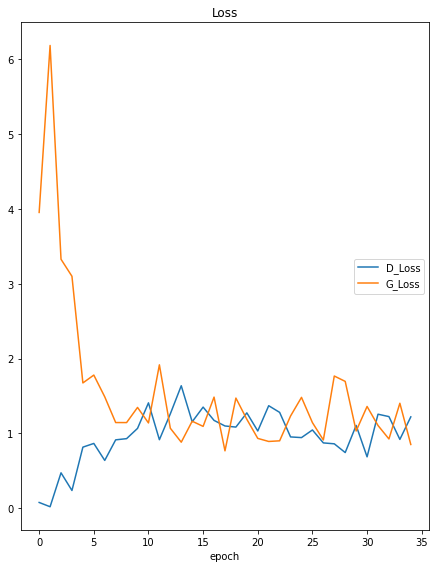

Loss
	D_Loss           	 (min:    0.021, max:    1.638, cur:    1.222)
	G_Loss           	 (min:    0.768, max:    6.184, cur:    0.853)
G_loss: 0.8529399037361145, D_loss: 1.2219769954681396


In [49]:
epochs = 35
liveloss = PlotLosses(groups={'Loss': ['D_Loss', 'G_Loss']})

for epoch in range(epochs):
    print('starting {} epoch'.format(epoch))
    logs = {}
    for i, (batch, label) in enumerate(train_dataset):
        real_img = Variable(batch).to(device)
        D_loss = D_train(real_img, label)
        G_loss = G_train()
        logs['D_Loss'] = D_loss
        logs['G_Loss'] = G_loss
    liveloss.update(logs)
    liveloss.draw()
    print('G_loss: {}, D_loss: {}'.format(G_loss, D_loss))

# Basically just training and liveplot loss for both G and D.

In [50]:
torch.save(G,'cgan.pkl')

In [51]:
G = torch.load('cgan.pkl')

# Q3 Example Plot

In [52]:
def plot_grid1_cov(discriminator,label_numbers):
    label_true = [Variable(torch.from_numpy(np.random.randint(i, i+1, 10))).to(device) for i in range(label_numbers)]
    label_true = torch.stack(label_true)
    label_final = torch.cat([label_true[i] for i in range(label_numbers)], 0)
    y = torch.zeros(batch_size,10,1,1).to(device)
    for x,l in enumerate(label_final):
      y[x,l.item(),:,:] = 1.0
    label_grid = y
    z = torch.randn(batch_size,100, 1, 1).to(device)
    final_grid = discriminator(z, label_grid)
    final_grid = make_grid(final_grid.unsqueeze(1), nrow = 10)
    plt.figure(figsize=(8,8))
    plt.imshow(abs(final_grid.permute(1,2,0)).cpu())
    plt.xticks([])
    plt.yticks([])
    plt.show()
    plt.savefig("./generated_image2.jpg")
    
# Functions for ploting 10*10 matrix of each example classes using random inputs but organzied labels.

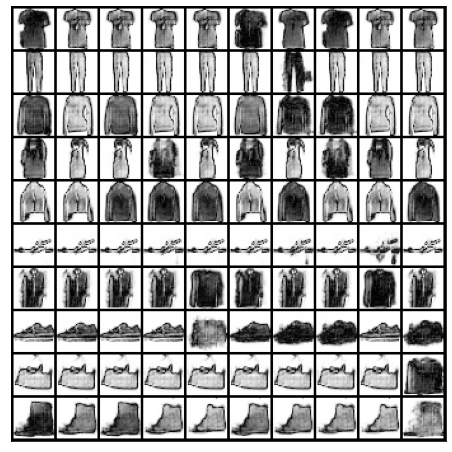

<Figure size 432x288 with 0 Axes>

In [58]:
plot_grid1_cov(G,10)

<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the two networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

# Solution

# Discussion on CVAE

From the 10*10 example images generated by CVAE model, we can observe that our generated images are quite ambigous and losing a lot of details compared to the FashionMNIST images. For example, decorations on the T-shirt and some special designs for outfits are mostly ignored by our CVAE model. However, our CVAE model successfully classified and generate correct type of outfits by puttting different labels. What's more, our CAVE model performs very well in predicting the overall shape of various outfit and did not predict some 'average' features, which means that our convolutional tricks might feed more usable features to the further layers and help it identify more different patterns in the outfit dataset. Addtionally, we can see from the loss graph that our loss decreases really slow after 40 ephos and the magnititude of loss is comparatively large compared to CGAN model.



# Improvement on CVAE

Firstly, CVAE model can be modified fully as convolutional ones. CNN are relatively accurate at image recognition and fully make use of the same knowledge across all image locations by defining different receptive fields.
Secondly, there are lots of hyperparameters for us to optimize and they might make huge difference on the performance of loss functions.

# Discussion on CGAN

In general, our CGAN model acheived the goals of classifying and generating correct types of outfits by combing inputs with different labels. What's more, the images generated by CGAN model are more unambiguous and we can observe more specific decorations and details on the outfits. However, the images generated for each of the class are quite in 'average' patterns compared to what we have saw in the CVAE model.

For the loss-plot part, one can clearly observe that g-loss and d-loss starts to converge within a certain interval in barely 10 epochs, which means that our discriminator is too weak or generator is too strong to fool the authority. In fact, I intentionally did some simplifications on the discriminator to weaken its ability and let the plot converge fast in early epochs. The reason I 'cheat' in this way is that I found CGAN model is nearly untrainable on a strong discriminator with complex convolutional basis. (Discriminators have almost zero losses while generators never 'touch' them.) As a trade-off, we only generated very 'basic' features for each of the class.

# Improvement on CGAN

Generally, CGAN model are hard to train and typically have unclear stopping criteria. So one advice is that we can implement WGAN with label conditional training. WGAN measures and optimises the Wasserstein distance between two distributions. With this simple modifications, we can find that training process is more stable and the loss is more "meaningful" as an indicator of the generated data.

In addition, as more specific to our CGAN model, I wish to do more experiments on convolutional layers to balance the power of discriminators and generator and generate a more accurate results. Apart from that, the choice of hyperparameters are really importment here since CGAN model has no stopping criteria sothat one also wishes to optimize these parameters and seek for more legit images. 

# CVAE vs CGAN

CVAE model performs well in predicting the different shapes of outfits but falied to generate clear images and some of the classifcations.
While CGAN model performs well in generateing clear images and classification but it predicts a little bit 'average' compared to the results of CVAE model.
Hence it is a little hard to demonstrate which one is better but they all have their own advantanges. But I think with more time to balance the relationships between discriminators and generators, CGAN models will eventually outperform the CVAE model.

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

# Solution
Choose CVAE.

In [78]:
indices2 = train_set.targets == 2 
indice_2 = np.where(indices2)[0]
drop_2 = np.random.choice(indice_2, size=5400,replace=False)
label = np.array([i for i in range(60000)])
label_idx = np.array([i for i in range(60000) if i not in drop_2])
# Get indices for target 2 and eliminate 90% of that indices. 
# Finally returning the label_idx as 'imbalanced index'

In [79]:
label_idx.shape

(54600,)

In [91]:
transform2 = transforms.Compose([transforms.ToPILImage(),
                                #  transforms.Resize(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,))])
# New transformation for custom dataset.

In [92]:
X_train, y_train = train_set.data[label_idx], train_set.targets[label_idx]

In [93]:
class CustomImageTensorDataset(Dataset):
    def __init__(self, data, targets, transform=None):

        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample, label = self.data[idx], self.targets[idx]
        if self.transform:
            sample = self.transform(sample)

        return sample, label
# Custom dataset for transformation and data loading.

In [94]:
train_set1 = CustomImageTensorDataset(X_train, y_train, transform=transform2) 
train_dataset1 = DataLoader(train_set1, batch_size=100, shuffle=True)
# Create imbalanced dataset and dataloader for label_2.

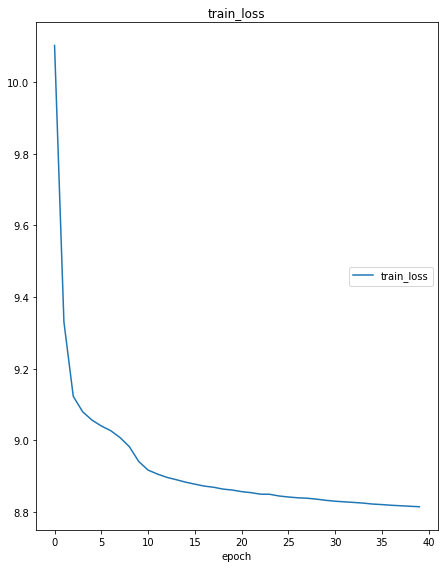

train_loss
	train_loss       	 (min:    8.815, max:   10.102, cur:    8.815)
done


In [96]:
def train(autoencoder, data, epochs, kl_div_on=True):
  set_seed(42)
  liveloss = PlotLosses() 
  opt = torch.optim.Adam(autoencoder.parameters())
  for epoch in range(epochs): # Run data over numerous epochs
    logs = {} 
    train_loss = 0
    for batch, label in data:  # Iterate over the batches of images and labels
      batch = batch.to(device)  # Send batch of images to the GPU
      labels = F.one_hot(label,10).to(device)
      opt.zero_grad()  # Set optimiser grad to 0
      x_hat, KL = autoencoder(batch,labels)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      loss = ((batch - x_hat)**2).sum() + KL  # Calculate combined loss
      loss.backward()  # Back-propagate
      train_loss += np.log(loss.detach().cpu().numpy())*batch.size(0) # define our training loss
      opt.step()  # Step the optimiser

    logs['train_loss'] = (train_loss/len(data.dataset)) # plot the training loss.
    liveloss.update(logs)
    liveloss.draw()   

  return autoencoder  # Return the trained autoencoder (for later analysis)

dims_latent = 48  # Maybe increase this
CVAE = CVariationalAutoencoder(dims_latent).to(device)
CVAE = train(CVAE, train_dataset1, 40)

print('done')
# Training with CVAE but with imbalanced dataset.

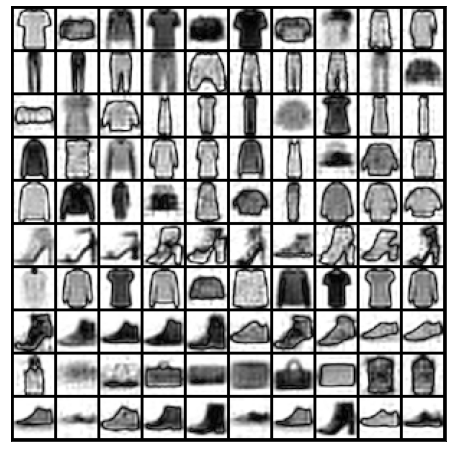

<Figure size 432x288 with 0 Axes>

In [101]:
plot_grid(CVAE,10) # 10*10 matrix plot for imbalanced dataset.

# Interpretations

Firstly, we can see from the loss plot that the overall loss is much higher. It is reasonable since we random eliminate 90 percent amount of data in label_2 so that the CVAE model got less sample to train.

Let's dive into the 10*10 matrix with labeled inputs. As predicted, these images are far more ambigous but our CVAE model still generates various shapes for different outfit types. And most importantly, since we eliminated 90 percent of the data in label_2, one can directly observe that our CVAE model failed to generate correct images with label_2 and made some random productions for all labels, which is similiar to VAE. For example, we can see dresses, t-shirts and even some unrecognizable things in the row of label_2. It's also reasonable since we imbalanced sampling data with label_2, giving CVAE less oppotunities to recognize it.    



